In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data=pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.columns = [
    'Gebelik Sayısı',
    'Glukoz',
    'Kan Basıncı',
    'Cilt Kalınlığı',
    'İnsülin',
    'Vücut Kitle İndeksi',
    'Diyabet Aile Geçmişi',
    'Yaş',
    'Sonuç'
]


In [4]:
data.head()

,Gebelik Sayısı,Glukoz,Kan Basıncı,Cilt Kalınlığı,İnsülin,Vücut Kitle İndeksi,Diyabet Aile Geçmişi,Yaş,Sonuç
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gebelik Sayısı        768 non-null    int64  
 1   Glukoz                768 non-null    int64  
 2   Kan Basıncı           768 non-null    int64  
 3   Cilt Kalınlığı        768 non-null    int64  
 4   İnsülin               768 non-null    int64  
 5   Vücut Kitle İndeksi   768 non-null    float64
 6   Diyabet Aile Geçmişi  768 non-null    float64
 7   Yaş                   768 non-null    int64  
 8   Sonuç                 768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.corr().T

,Gebelik Sayısı,Glukoz,Kan Basıncı,Cilt Kalınlığı,İnsülin,Vücut Kitle İndeksi,Diyabet Aile Geçmişi,Yaş,Sonuç
Gebelik Sayısı,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glukoz,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
Kan Basıncı,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
Cilt Kalınlığı,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
İnsülin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
Vücut Kitle İndeksi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
Diyabet Aile Geçmişi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Yaş,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Sonuç,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [7]:
correlation_matrix = data.corr()
correlation_with_outcome = correlation_matrix['Sonuç'].sort_values(ascending=False)

print(correlation_with_outcome)

Sonuç                   1.000000
Glukoz                  0.466581
Vücut Kitle İndeksi     0.292695
Yaş                     0.238356
Gebelik Sayısı          0.221898
Diyabet Aile Geçmişi    0.173844
İnsülin                 0.130548
Cilt Kalınlığı          0.074752
Kan Basıncı             0.065068
Name: Sonuç, dtype: float64


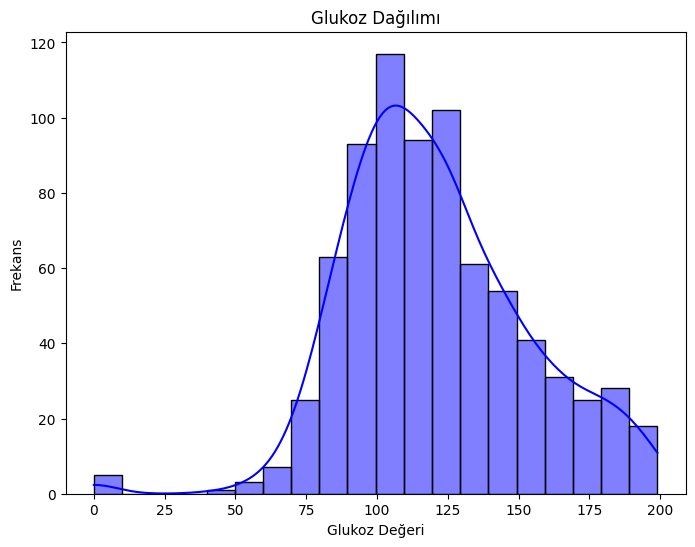

In [8]:
# Glukoz Histogramı
plt.figure(figsize=(8, 6))
sns.histplot(data['Glukoz'], bins=20, kde=True, color='blue')
plt.title('Glukoz Dağılımı')
plt.xlabel('Glukoz Değeri')
plt.ylabel('Frekans')
plt.show()


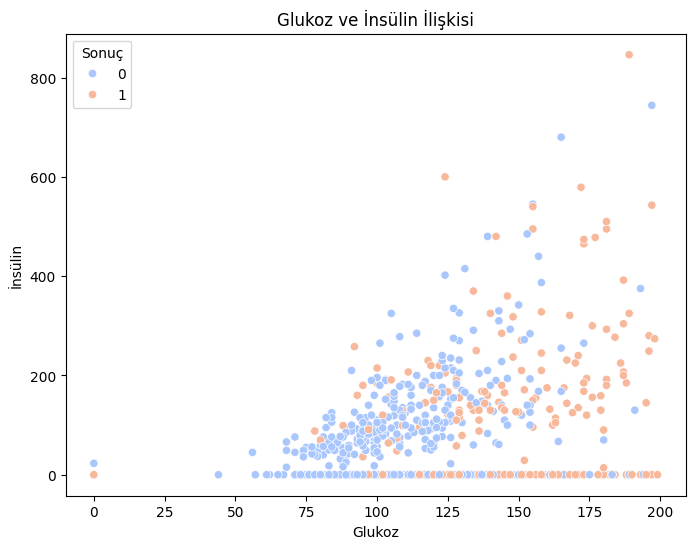

In [9]:
# Glukoz ve İnsülin Dağılım Grafiği
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Glukoz', y='İnsülin', data=data, hue='Sonuç', palette='coolwarm')
plt.title('Glukoz ve İnsülin İlişkisi')
plt.xlabel('Glukoz')
plt.ylabel('İnsülin')
plt.show()


C:\Users\Mert Yusuf\AppData\Local\Temp\ipykernel_9716\1527100611.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sonuç', y='Vücut Kitle İndeksi', data=data, palette='Set2')


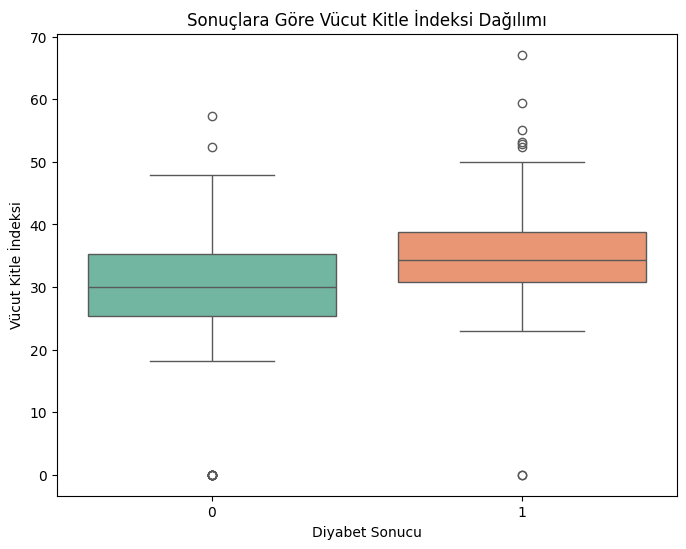

In [10]:
# Vücut Kitle İndeksi Kutu Grafiği
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sonuç', y='Vücut Kitle İndeksi', data=data, palette='Set2')
plt.title('Sonuçlara Göre Vücut Kitle İndeksi Dağılımı')
plt.xlabel('Diyabet Sonucu')
plt.ylabel('Vücut Kitle İndeksi')
plt.show()


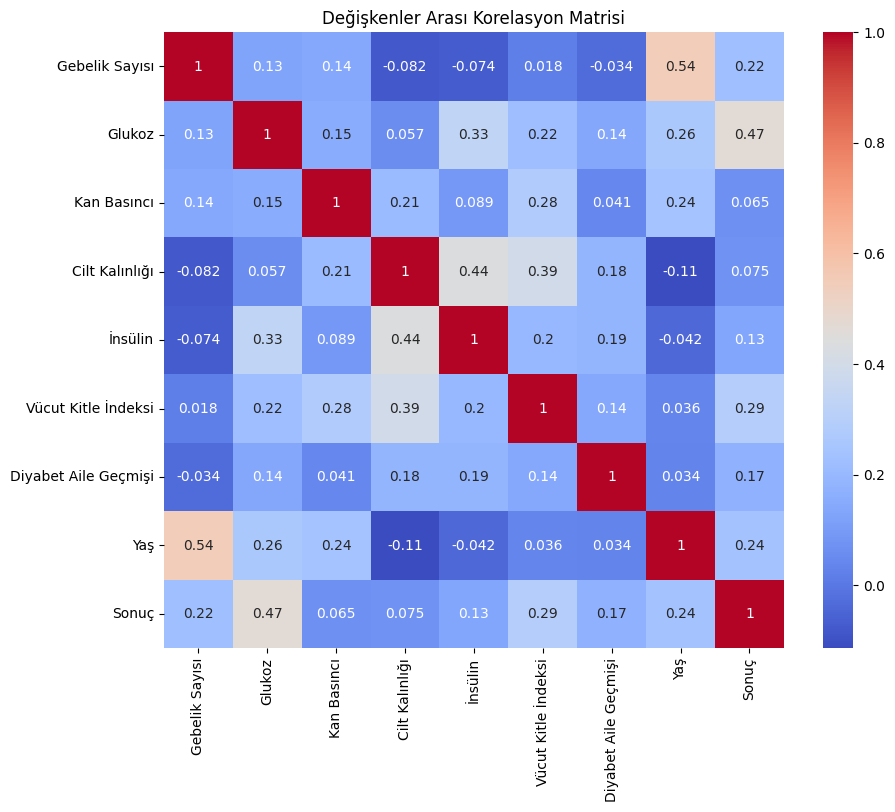

In [11]:
# Korelasyon Matrisi Isı Haritası
plt.figure(figsize=(10, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Değişkenler Arası Korelasyon Matrisi')
plt.show()


In [12]:
# Hedef ve özellik değişkenlerini ayırma
x = data.drop(columns=['Sonuç'])  # Özellikler
y = data['Sonuç']  # Hedef değişken

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [14]:
print("Eğitim seti boyutu:", x_train.shape)
print("Test seti boyutu:", x_test.shape)

Eğitim seti boyutu: (614, 8)
Test seti boyutu: (154, 8)


In [15]:
rf_model=RandomForestClassifier(n_estimators=200,random_state=42,max_depth=10)
rf_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

In [16]:
y_train_pred=rf_model.predict(x_train)
y_test_pred=rf_model.predict(x_test)

In [17]:
accuracy_score(y_test,y_test_pred)

0.7272727272727273

In [18]:
# Hiperparametre ayarlama örneği
rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)


In [19]:
accuracy_score(y_test,y_test_pred)

0.7272727272727273

In [20]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [21]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           scoring='accuracy',  # Değerlendirme metriği
                           cv=5,                # Çapraz doğrulama kat sayısı
                           n_jobs=-1,          # Tüm işlemcileri kullan
                           verbose=2)          # İlerleme bilgisi

# Modeli eğitme
grid_search.fit(x_train, y_train)

# En iyi parametreler ve en iyi doğruluk skoru
print("En İyi Hiperparametreler:", grid_search.best_params_)
print("En İyi Doğruluk Skoru:", grid_search.best_score_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
En İyi Hiperparametreler: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
En İyi Doğruluk Skoru: 0.7834199653471945


# KARAR AĞACI 

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [24]:
# Karar ağacı modelini oluşturma
dt_model = DecisionTreeClassifier(random_state=42)

# Modeli eğitme
dt_model.fit(x_train, y_train)

# Test seti üzerinde tahmin yapma
y_test_pred = dt_model.predict(x_test)

# Doğruluk skorunu hesaplama
accuracy = accuracy_score(y_test, y_test_pred)
print("Karar Ağacı Modelinin Doğruluk Skoru:", accuracy)


Karar Ağacı Modelinin Doğruluk Skoru: 0.7467532467532467


In [25]:
param_grid = {
    'criterion': ['gini', 'entropy'],        # Ayrım ölçütü
    'max_depth': [None, 10, 20, 30],         # Ağaç derinliği
    'min_samples_split': [2, 5, 10],         # Minimum örnek sayısı
    'min_samples_leaf': [1, 2, 4]            # Minimum yaprak sayısı
}


In [26]:
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=-1,
                           verbose=2)

# Modeli eğitme
grid_search.fit(x_train, y_train)

# En iyi parametreler ve en iyi doğruluk skoru
print("En İyi Hiperparametreler:", grid_search.best_params_)
print("En İyi Doğruluk Skoru:", grid_search.best_score_)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
En İyi Hiperparametreler: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5}
En İyi Doğruluk Skoru: 0.7410635745701718


# ÇOKLU KARŞILAŞTIRMA

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [28]:
# Modellerin doğruluk skorlarını saklayacağımız bir liste
results = []

# Karar Ağacı Modeli
dt_model = DecisionTreeClassifier(max_depth= None,random_state=42)
dt_model.fit(x_train, y_train)
dt_pred = dt_model.predict(x_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
results.append({'Model': 'Karar Ağacı', 'Doğruluk Skoru': dt_accuracy})



# Random Forest Modeli
rf_model = RandomForestClassifier(
    n_estimators=100,           # Ağaç sayısı
    max_depth=None,             # Maksimum derinlik (None: Sınırsız derinlik)
    min_samples_leaf=1,         # Yaprakta olması gereken minimum örnek sayısı
    min_samples_split=5,        # Düğümleri bölmek için gereken minimum örnek sayısı
    random_state=42             # Rastgelelik için sabitlenmiş seed
)

# Modeli eğitme
grid_search.fit(x_train, y_train)
rf_model.fit(x_train, y_train)
rf_pred = rf_model.predict(x_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
results.append({'Model': 'Random Forest', 'Doğruluk Skoru': rf_accuracy})

# Sonuçları DataFrame'e dönüştürme
results_df = pd.DataFrame(results)
print(results_df)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
           Model  Doğruluk Skoru
0    Karar Ağacı        0.746753
1  Random Forest        0.733766
